# Methods Evaluation

Notebook used to compute and compare on the metric resutls of each model. The evaluation graphs used in the report are generated with this notebook.

Requirements not available in this repository:
* To be able to run this code one needs to run it in an eviroment with the python packages: __seaborn__, __matplotlib__, __pandas__.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from constants import *

In [2]:
# Read the metric results for each method.
results = pd.read_csv('../metric_results.csv', delimiter=';', index_col=0)

In [3]:
results.head()

,Subject Code,Team Name,Dice Similarity Coeff.,Haudorff Coeff. (mm),Avg. Volume Diff.,Recall,Lesion F1 Coeff.,Number of detected WMH,Number of true WMH
0,033015_20101214,coroflo,0.017207,23.808866,0.920096,0.177778,0.133111,8.0,45.0
1,032140_20100223,coroflo,0.174652,26.743929,0.825853,0.441176,0.307979,15.0,34.0
2,043483_20100413,coroflo,0.049080,25.809184,0.893184,0.225000,0.177866,9.0,40.0
3,027883_20101215,coroflo,0.017724,33.516847,0.788016,0.260870,0.089552,6.0,23.0
4,023891_20130423,coroflo,0.026923,28.950277,0.858397,0.232558,0.146699,10.0,43.0


In [4]:
# Group results by team and compute necessary metrics.
aggregated_results = results.groupby('Team Name').agg({
    DSC: ['mean', 'std', 'max'],
    HDF: ['mean', 'std', 'min'],
    VOL: ['mean', 'std', 'min'],
    REC: ['mean', 'std', 'max'],
    F1: ['mean', 'std', 'max'],
})
aggregated_results

Dice Similarity Coeff.                     Haudorff Coeff. (mm)  \
                              mean       std       max                 mean   
Team Name                                                                     
bigrbrain_2               0.090567  0.068362  0.288494            38.138464   
coroflo                   0.078516  0.057799  0.293737            29.359506   
neuroml_2                 0.055015  0.033108  0.163882            46.469033   
pgs                       0.033427  0.037234  0.156425            59.984319   

                                  Avg. Volume Diff.                      \
                   std        min              mean       std       min   
Team Name                                                                 
bigrbrain_2  11.990506  23.831164          0.841243  0.124642  0.318283   
coroflo       5.845913  19.202524          0.861943  0.080612  0.506255   
neuroml_2    12.392330  26.348574          0.521774  0.457175  0.004097   
pgs          19.200876  27.651453          0.968183  0.037752  0.814725   

               Recall                     Lesion F1 Coeff.                      
                 mean       std       max             mean       std       max  
Team Name                                                                       
bigrbrain_2  0.184235  0.090216  0.435897         0.201176  0.093618  0.498113  
coroflo      0.291199  0.108680  0.564103         0.214567  0.084233  0.543478  
neuroml_2    0.260158  0.116348  0.575758         0.084561  0.037030  0.266667  
pgs          0.092475  0.073414  0.387097         0.145125  0.098560  0.517986

In [5]:
# Functions to compute the Final Rank of a team for a given metric
def getRankingHigherIsBetter(df, metric): 
    return 1.0 - getRankingLowerIsBetter(df, metric) 

def getRankingLowerIsBetter(df, metric): 
    rank = df.groupby('Team Name')[metric].mean() 

    highest  = rank.min()
    lowest = rank.max()

    return (rank - lowest) / (highest - lowest) 

In [6]:
# Compute Final Rank for each metric and Final Rank overall.
rankDsc    = getRankingHigherIsBetter(results, DSC)
rankH95    = getRankingLowerIsBetter(results, HDF)
rankAvd    = getRankingLowerIsBetter(results, VOL)
rankRecall = getRankingHigherIsBetter(results, REC)
rankF1     = getRankingHigherIsBetter(results, F1)

finalRank = (rankDsc + rankH95 + rankAvd + rankRecall + rankF1) / 5

finalRank = (finalRank.to_frame().reset_index()
                      .rename(columns={0:'Final Rank'})
                      .sort_values(by='Final Rank', ascending=False))
finalRank

,Team Name,Final Rank
1,coroflo,0.805418
0,bigrbrain_2,0.671288
2,neuroml_2,0.532587
3,pgs,0.093172


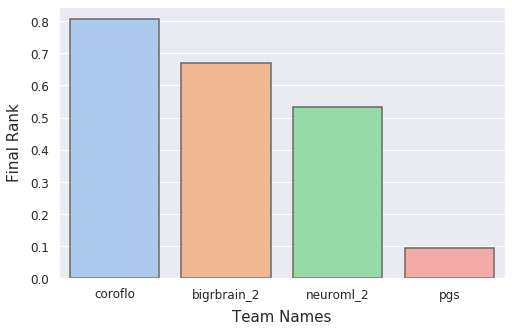

In [7]:
# Generate the plot for a given metric
sns.set()
sns.set_palette('pastel')
fig, ax = plt.subplots(figsize = (8, 5))
# sns.boxplot(ax=ax, data=results, x='Team Name', y=REC)
sns.barplot(axes=ax, data=pd.DataFrame(finalRank), x='Team Name', y='Final Rank',
            edgecolor='.4', linewidth=1.5)
ax.set_xlabel('Team Names', fontsize=15, labelpad=8)
ax.set_ylabel('Final Rank', fontsize=15, labelpad=8)
ax.tick_params(labelsize=12)
ax

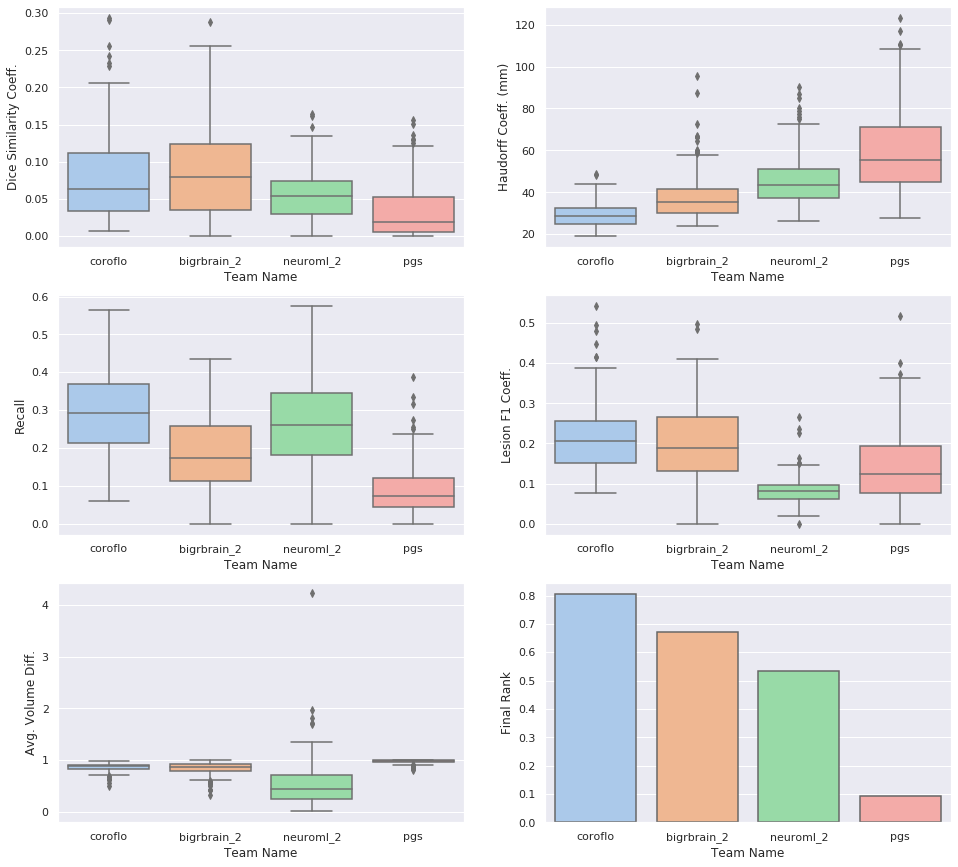

In [8]:
# Generate all plots
sns.set()
sns.set_palette('pastel')
fig, axes = plt.subplots(3, 2, figsize = (16, 15))
axes = axes.flatten()
for index, coef in enumerate([DSC, HDF, REC, F1, VOL]):
    sns.boxplot(ax=axes[index], data=results, x='Team Name', y=coef)
    ax.set_xlabel('Team Names', fontsize=15, labelpad=8)
    ax.set_ylabel(coef, fontsize=15, labelpad=8)
    ax.tick_params(labelsize=12)
sns.barplot(axes=axes[5], data=pd.DataFrame(finalRank), x='Team Name', y='Final Rank',
            edgecolor='.4', linewidth=1.5)